In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/creditcard.csv


Dataset Overview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

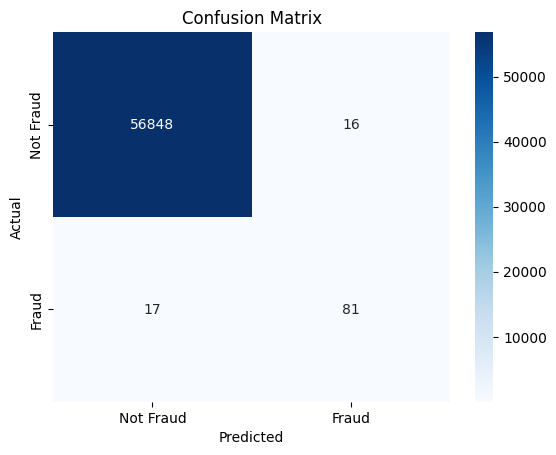


Feature Importances:
   Feature  Importance
14     V14    0.217013
10     V10    0.119797
4       V4    0.116789
12     V12    0.107501
17     V17    0.086248
3       V3    0.070860
11     V11    0.050472
16     V16    0.040096
2       V2    0.038845
9       V9    0.028277
21     V21    0.014494
7       V7    0.013033
1       V1    0.009717
0     Time    0.008175
18     V18    0.008127
6       V6    0.007645
8       V8    0.006986
13     V13    0.006578
27     V27    0.005479
19     V19    0.004808
28     V28    0.004396
26     V26    0.004323
20     V20    0.004318
5       V5    0.004266
29  Amount    0.004097
22     V22    0.003987
15     V15    0.003906
23     V23    0.003481
24     V24    0.003180
25     V25    0.003106

Model saved as 'credit_card_fraud_model.pkl'


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


data = pd.read_csv("/kaggle/input/ccdata/creditcard.csv")  # Replace with your file path if needed


print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())


class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

#Legit and Fraud Amount Analysis
legit = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

print("\nLegit Transaction Amount:")
print(f"Total: {legit['Amount'].sum():.2f}, Average: {legit['Amount'].mean():.2f}, Count: {len(legit)}")

print("\nFraud Transaction Amount:")
print(f"Total: {fraud['Amount'].sum():.2f}, Average: {fraud['Amount'].mean():.2f}, Count: {len(fraud)}")

#Target split
X = data.drop('Class', axis=1)
y = data['Class']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Smot to maintain class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter Resampling:")
print(pd.Series(y_train_resampled).value_counts())

# modeltrain
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(sorted_importances)

# Save Feature Importances to a CSV (optional)
sorted_importances.to_csv("feature_importances.csv", index=False)

joblib.dump(rf_model, "credit_card_fraud_model.pkl")
print("\nModel saved as 'credit_card_fraud_model.pkl'")
